In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read both csv files from raw data folder
clinical_df = pd.read_csv('raw_data/clinicaltrial_data.csv')
mouse_df = pd.read_csv('raw_data/mouse_drug_data.csv')

In [3]:
# check clinical data frame
clinical_df.head()
clinical_df.shape
# clinical_df.loc[clinical_df['Mouse ID'] == 'g989']

(1893, 4)

In [4]:
# check mouse data frame
mouse_df.head()
mouse_df.shape
# mouse_df.loc[mouse_df['Mouse ID'] == 'g989']
# mouse_df['Drug'].value_counts()

(250, 2)

In [5]:
# combine two data frames
df = pd.merge(clinical_df, mouse_df, on='Mouse ID', how='outer')
df.head()
df.shape

(1906, 5)

In [6]:
# list of drugs interested
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [7]:
# generate function to check tumor change after drug treatment
def Tumor_change_single_drug(change, drug):
    temp_df = df.loc[df['Drug'] == drug]
    new_df = pd.DataFrame(temp_df.groupby('Timepoint')[change].mean())
    new_df.reset_index(inplace = True)
    plt.errorbar(x = new_df['Timepoint'], y = new_df[change],
                 yerr = temp_df.groupby('Timepoint')[change].sem(), 
                 fmt = 'o--', label = drug, elinewidth = 1, capthick = 1, capsize = 5)

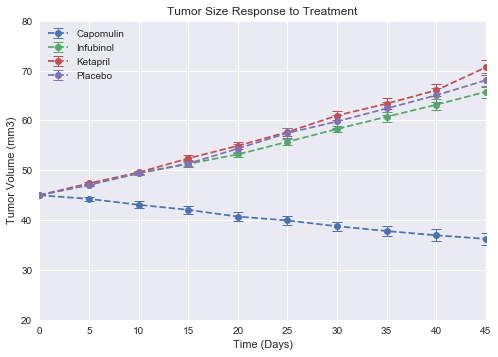

In [8]:
# plot for tumor size change for drugs interested
for drug in drugs:
    Tumor_change_single_drug('Tumor Volume (mm3)', drug)
plt.title('Tumor Size Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc = 'best')
plt.xlim(0, 45)
plt.ylim(20, 80)
plt.show()

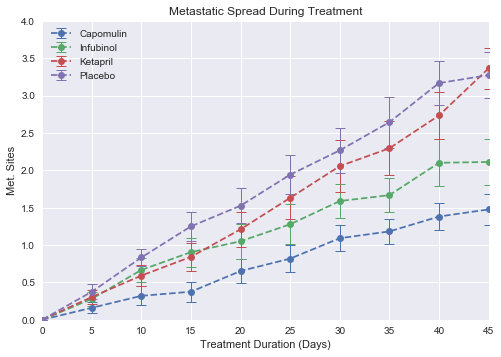

In [9]:
# plot for tumor spreading change for drugs interested
for drug in drugs:
    Tumor_change_single_drug('Metastatic Sites', drug)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(loc = 'best')
plt.xlim(0, 45)
plt.ylim(0, 4)
plt.show()

In [10]:
# generate function to check animal survival after drug treatment
def mouse_survival_single_drug(drug):
    temp_df = df.loc[df['Drug'] == drug]
    new_df = pd.DataFrame(temp_df.groupby('Timepoint')['Mouse ID'].count())
    new_df.reset_index(inplace = True)
    plt.plot(new_df['Timepoint'], new_df['Mouse ID']/new_df['Mouse ID'][0]*100,
             'o--', label=drug)

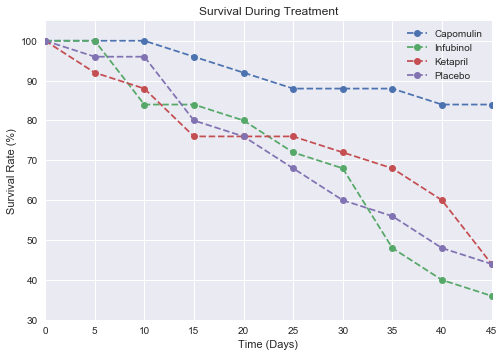

In [11]:
# plot for mouse survival for drugs interested
for drug in drugs:
    mouse_survival_single_drug(drug)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc = 'best')
plt.xlim(0, 45)
plt.ylim(30, 105)
plt.show()